# *Preliminary design on sheet*

# Step 1) choosing of core material

Depending on switching frequency which is at least 100kHz, "Ferrite Core" is suitable for application.
This is because of the fact that "Relative Core Loss" of ferrite is low other than of powdered cores,laminations iron&silicon steel.
My referrence is the notes on EE361.

# Step 2) choosing of operating Flux Density depending on determined material

Commonly, manganese-zinc ferrites are used. These ferrites offers very low coercivity, that means the material's magnetization can easily reverse direction without dissipating much energy (hysteresis losses), even they do not need core lamination to reduce “Eddy Current” losses as the Powder core itself offers High resistance.

Choose Bmax = 0.35T, Bsat = 0.5T is the determination for ferrite core.

In [78]:
Bm=0.35;
Bsat=0.5;

# Step 3) determination of minimum required N1.Ac product

V1rms=4*Bsat*Ac*N*f*e-8 #For square wave operated transformers

In [79]:
Bm=0.35;#in units of tesla
Bmgau=0.35*1e4; #in units of gauss
Bsat=0.5; #in units of tesla
Bsatgau=0.5*1e4;  #in units of gauss
V1=417; #applied peak voltage to primary winding
V1rms=417; #applied rms voltage to primary winding
V2=12500; #obtained peak voltage at secondary winding
V2rms=12500; #applied rms voltage to primary winding
Pout=30000; #rated output power
fsw=100000; #switching frequency of transformer
fswmax=500000; #maksimum switching frequency of transformer
pi=3.141592;
a=V1/V2 #turns ratio of transformer
N1Ac=(V1rms*1e8)/(Bsatgau*fsw*4);
print (N1Ac)#minimum required N1.Ac product for designed transformer
#Ac will be determined by chosen core,therefore N1 will be calculated from this product

20.85


# Step 4) choosing of core material & geometry

Here, we will calculate the required "power handling capacity" of the core. From this calculated value and by the help of the catalogues, the required core material and geometry will be chosen.

Power handling capacity is the product of Wa(window area) and Ac (core area).

In [80]:
C=5.07e-3; #current capacity in cm2/ampere
e=0.95; #efficiency of the transformer
K=0.3; #winding factor
WaAc=(Pout*C*1e8)/(4*e*Bsatgau*fsw*K)
print (WaAc)

26.68421052631579


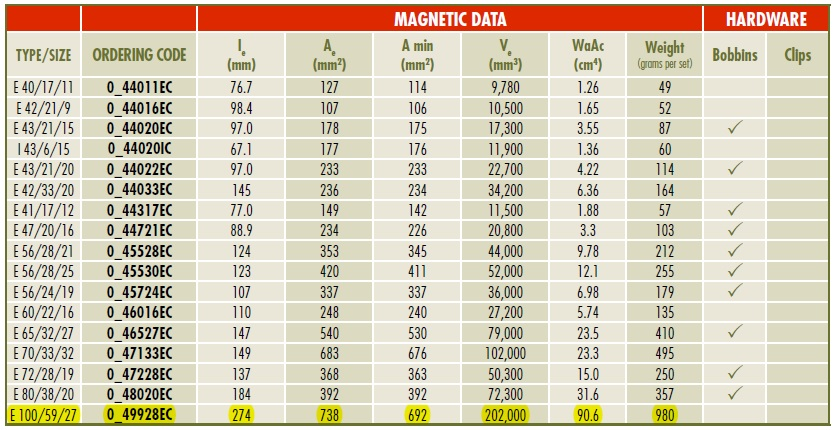

In [81]:
from IPython.display import Image 
Image(filename='core.jpg')

Required WaAc is calculated. From the ferrite core catalogue, "49928EE" ferrite core is suitable for application, because it has 90.6 WaAc product. "EE" corresponds double E configuration for transformer. Material type determines AL value of the core and choosing as high yields high inductance with low turns at windings. P type material can be choosen from catalogue. It is a little higher than required WaAc product,but when i checked the catalogue. I have seen that double EE core for whose WaAc value is lower than 90.6 can not handle 26.5kW power lower than 100kHz. It is also below the rated  power for 100kHz, but by considering the operation time of the transformer, it would be enough for our reuqirements. Addition to this,by considering the operation frequency which will be 100kHz as minimum and considering the core's capacity @250kHz operation which is at 51.6kW. This core material and WaAc product is optimum for the design.

Core datas are shown below. It was taken from the link, https://www.mag-inc.com/

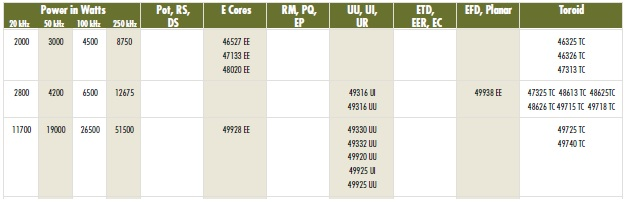

In [82]:
from IPython.display import Image 
Image(filename='power capacity.jpg')

In [83]:
WaAc=90.6; #cm^4
AL=6.773e-6; #H/turn for P type material
le=274; #in mm,effective length
Ac=738; #in mm2,effective cross sectional area
Accm2=Ac/1e2; #in cm2,effective cross sectional area
Ve=202000; #mm3
Weight=980; #grams per set of the core
#lengths of the parts of the cores are at below.
A=100.3; #in units of mm
B=59.4;#in units of mm
C=27.5;#in units of mm
D=46.85;#in units of mm
E=72;#in units of mm
L=13.75;#in units of mm

# Step 5) determining the number of turns 

Number of turns determination will be done by N1.Ac product and the Ac determined by core cross-sectional area.

In [84]:
N1=(N1Ac)/(Accm2); # The N1Ac changed cm2 to mm2
print (N1)
N1opt=round (N1);
print (N1opt)

2.8252032520325208
3


Now, go on by determining the turns number of secondary winding

In [85]:
N2=N1/a;
print (N2)
N2opt=round (N2);
print (N2opt)

84.68834688346885
85


# Step 6) determining the winding conductor sizes

Now,there should be determation of secondary current of transformer, and then primary current of the transformer.

In [86]:
I2rms=Pout/V2rms;
print(I2rms) #in units of Amper

2.4


Now,there should be determation of primary current of the transformer by using turns ratio.

In [87]:
I1rms=I2rms/a;
print (I1rms); #in units of Amper

71.94244604316546


Now, we should specify the current density "J" in units of "A/mm2". The general approach for current density is 3A/mm2.

Now,i will determine conductor cross sectional area,"CAc_I2", for secondary current and primary current which is "CAc_I1".

In [88]:
j=3; #current density in units of A/mm2
CAc_I2=I2rms/j;
print (CAc_I2) #in units of mm2

0.7999999999999999


In [89]:
CAc_I1=I1rms/j;
print (CAc_I1) #in units of mm2

23.98081534772182


Depending on found "CAc_I1","CAc_I2", i should determine skin depth to check the applicability. It is thought that circular wire was chosen.

In [90]:
skdp=0.066/(fswmax**(1/2)); #skin depth in units of m. By thinking of pure "COPPER" was chosen.
skdpmm=skdp*1e3; #skin depth in units of mm
print (skdpmm);

0.09333809511662428


In [93]:
Area_AWG3=26.7;#in units of mm2 for primary current
Area_AWG18=0.823;#in units of mm2 for primary current
radius_square_AWG18=Area_AWG18/pi;
radius_AWG18=radius_square_AWG18**(1/2);
diameter=radius_AWG18*2;
print (diameter);

1.0236583235247618


AWG18 and AWG3 cables have chosen according only to checking the current density. However,the skin depth is so much lower than the diameter of AWG18. This means that it is not necessary to use such kind of a conductor. I will decrease the cable cross sectional area.

In [105]:
Area_AWG33=0.0254;#in units of mm2
radius_square_AWG33=Area_AWG33/pi;
radius_AWG33=radius_square_AWG33**(1/2);
diameter_AWG33=radius_AWG33*2;
print (diameter_AWG33);

0.17983406563963253


Now,AWG33 is nearly equal to skindepth.I should check whether i can use this winding by considering current passing through the conductor.

In [108]:
required_number_parallel=CAc_I2/Area_AWG33;
print (required_number_parallel); #required number of parallel windings for secondary windings

31.49606299212598


REQUIRED AREA will be calculated and checked for primary and secondary windings.

In [92]:
#lwire=;#length of copper wire
#aradi=;#radius of copper wire
#ro=5.8e7;#conductivity of "pure copper" wire in units of Siemens/meter.
#Reff=lwire/(ro*2*pi*aradi*skdp*)  #will be calculated.

SyntaxError: invalid syntax (<ipython-input-92-3ce3735b73c6>, line 1)